In [1]:
from wyx_joint import *
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "Fermi-LAT-3FHL_data_Fermi-LAT.fits"
hdul=fits.open(fname)

counts=hdul["COUNTS"].data
exposure = hdul["EXPOSURE"].data
background = hdul["BACKGROUND"].data
hdul['COUNTS'].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   50                                                  
NAXIS2  =                   40                                                  
NAXIS3  =                    5                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 25.5 / Pixel coordinate of reference point            
CRPIX2  =                 20.5 / Pixel coordinate of reference point            
CDELT1  =                 -0.1 / [deg] Coordinate increment at reference point  
CDELT2  =                  0

In [3]:
skydir=(0,0)
width=(4,5)
binsz=hdul['COUNTS'].header["CDELT2"] 
test_model=GaussianSpatialModel(0.2,skydir,width,binsz)

energy_axes=PowerLawSpctralModel(1e-10,-2,name='Energy')
energy_axes.make_edges(width=(np.log10(0.01),np.log10(2)),num=6)

test_map=MapModel(geom=test_model,axes=energy_axes,exposure=exposure,background=background)
res=test_map.fit(counts)

C:\Users\wyx\Python\Gammapy\my\joint\wyx_joint.py:122: RuntimeWarning: invalid value encountered in log10
  log_like = np.sum(counts * np.log10(pred_cube + 1e-12)) - data_factorial


Optimization terminated successfully.
         Current function value: 1091.209030
         Iterations: 307
         Function evaluations: 553


Text(0.5, 1.0, 'real')

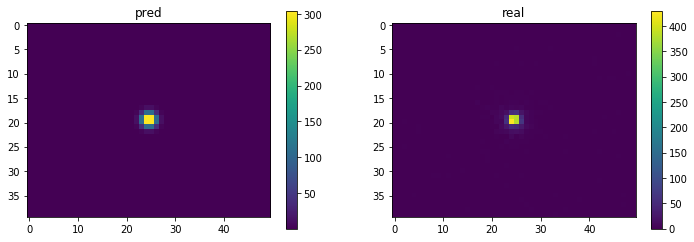

In [4]:
fig=plt.figure(figsize=(12,4))
ax=plt.subplot(1,2,1)
pred_counts=test_map.predict()
plt.imshow(pred_counts.sum(axis=0))
plt.colorbar()
plt.title('pred')

ax=plt.subplot(1,2,2)
plt.imshow(counts.sum(axis=0))
plt.colorbar()
plt.title('real')

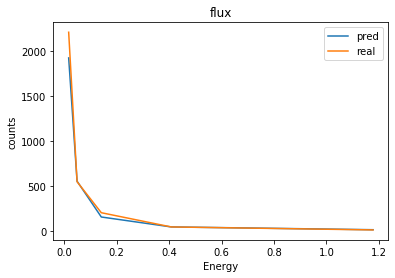

In [5]:
test_map.plot_flux(counts)